In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# Printing the date in the order of year, month, and day

date = dt.datetime(2023, 8, 20)
print('The date today is' , date)

The date today is: 2023-08-20 00:00:00


In [ ]:
# Printing the date using strftime() method

print('The date today is' , date.strftime('%B %d, %Y'))

The date today is August 20, 2023


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving weather.csv to weather.csv


In [ ]:
weather = pd.read_csv('weather.csv')

columns = ['date' , 'wind']
weather = weather[columns]

weather

,date,wind
0,2012-01-01,4.7
1,2012-01-02,4.5
2,2012-01-03,2.3
3,2012-01-04,4.7
4,2012-01-05,6.1
...,...,...
1456,2015-12-27,2.9
1457,2015-12-28,1.3
1458,2015-12-29,2.6
1459,2015-12-30,3.4


In [ ]:
dates = pd.to_datetime(weather['date'])
print(dates.dtypes)

datetime64[ns]


In [ ]:
weather['date'] = pd.to_datetime(weather['date'], yearfirst=True)
print( weather.dtypes )
print('\n', weather.head())

date    datetime64[ns]
wind           float64
dtype: object

         date  wind
0 2012-01-01   4.7
1 2012-01-02   4.5
2 2012-01-03   2.3
3 2012-01-04   4.7
4 2012-01-05   6.1


In [ ]:
index = weather.set_index('date')
print(index.index)
print(weather.head())

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)
        date  wind
0 2012-01-01   4.7
1 2012-01-02   4.5
2 2012-01-03   2.3
3 2012-01-04   4.7
4 2012-01-05   6.1


In [ ]:
week= index.resample('w').mean()

print(week.index)
print('\n', week.head())

DatetimeIndex(['2012-01-01', '2012-01-08', '2012-01-15', '2012-01-22',
               '2012-01-29', '2012-02-05', '2012-02-12', '2012-02-19',
               '2012-02-26', '2012-03-04',
               ...
               '2015-11-01', '2015-11-08', '2015-11-15', '2015-11-22',
               '2015-11-29', '2015-12-06', '2015-12-13', '2015-12-20',
               '2015-12-27', '2016-01-03'],
              dtype='datetime64[ns]', name='date', length=210, freq='W-SUN')

                 wind
date                
2012-01-01  4.700000
2012-01-08  3.442857
2012-01-15  3.371429
2012-01-22  4.642857
2012-01-29  3.857143


In [ ]:
month = index.resample('m').mean()

print(month.index)
print('\n', month.head())

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', freq='M')

                 wind
date                
2012-01-31  3.900000
2012-02-29  3.903448


In [ ]:
year =  index.resample('y').mean()

print(year.index)
print('\n', year.head())

DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31'], dtype='datetime64[ns]', name='date', freq='A-DEC')

                 wind
date                
2012-12-31  3.400820
2013-12-31  3.015890
2014-12-31  3.387671
2015-12-31  3.159726


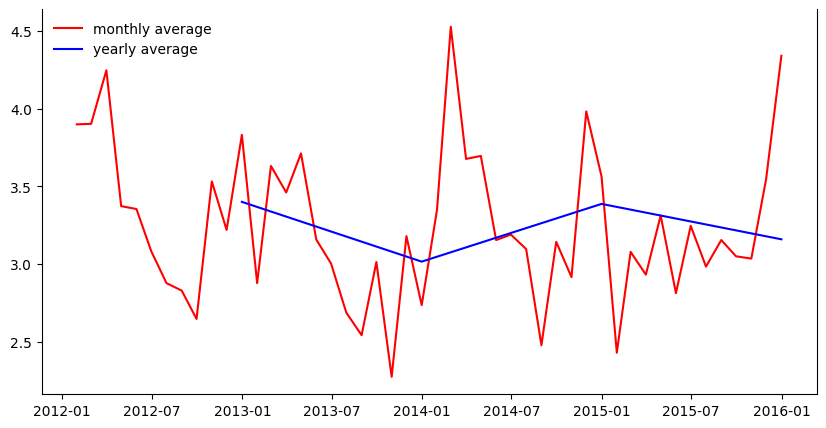

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(month.index, month['wind'], color = 'red', label = 'monthly average')
ax.plot(year.index, year['wind'], color = 'blue', label = 'yearly average')


ax.spines['top'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=False)

plt.show()

Slicing dates

In [ ]:
# one option

date_to_extract = dt.datetime(2012, 6, 18)
print('The wind speed on', date_to_extract.strftime('%B %d, %Y'), 'is', index.loc[date_to_extract, 'wind'] )

# a second option

print('The wind speed on June 18, 2012 is', index.loc['2012-06-18', 'wind'])

The wind speed on June 18, 2012 is 3.8
The wind speed on June 18, 2012 is 3.8


In [ ]:
print('Every week in 2008:', week.loc['2012'])
print('\nEvery week in Jan 2012:', week.loc['2012/01/01':'2012/01/31'])

Every week in 2008:                 wind
date                
2012-01-01  4.700000
2012-01-08  3.442857
2012-01-15  3.371429
2012-01-22  4.642857
2012-01-29  3.857143
2012-02-05  3.828571
2012-02-12  3.300000
2012-02-19  3.514286
2012-02-26  4.785714
2012-03-04  5.000000
2012-03-11  3.728571
2012-03-18  4.800000
2012-03-25  3.528571
2012-04-01  4.757143
2012-04-08  3.014286
2012-04-15  2.914286
2012-04-22  3.128571
2012-04-29  3.285714
2012-05-06  4.228571
2012-05-13  3.428571
2012-05-20  2.885714
2012-05-27  4.114286
2012-06-03  2.814286
2012-06-10  3.414286
2012-06-17  3.557143
2012-06-24  2.614286
2012-07-01  2.485714
2012-07-08  3.385714
2012-07-15  2.585714
2012-07-22  2.914286
2012-07-29  2.700000
2012-08-05  2.857143
2012-08-12  2.828571
2012-08-19  2.942857
2012-08-26  2.985714
2012-09-02  2.328571
2012-09-09  3.471429
2012-09-16  3.285714
2012-09-23  1.800000
2012-09-30  2.200000
2012-10-07  4.714286
2012-10-14  2.585714
2012-10-21  3.914286
2012-10-28  2.942857
2012-11-04  3.

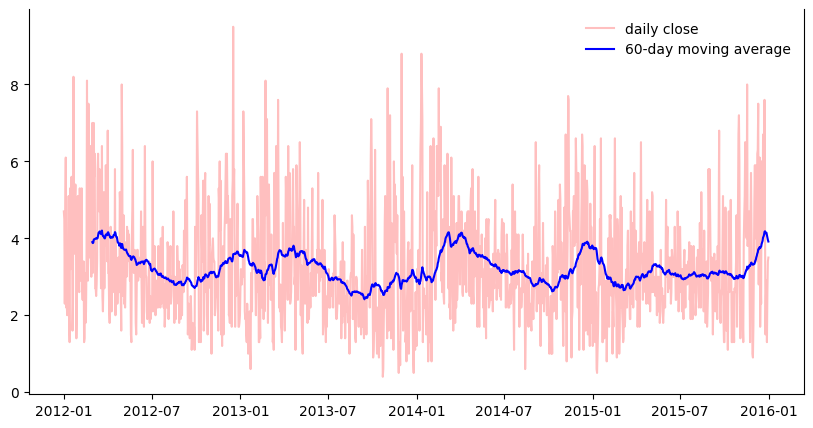

In [ ]:
# Rolling window calculations

index['moving_avg'] = index['wind'].dropna().rolling(60).mean()                             # create the moving average


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(index.index, index['wind'], color = 'red', label = 'daily close', alpha=0.25)
ax.plot(index.index, index['moving_avg'], color = 'blue', label = '60-day moving average')


ax.spines['top'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)

plt.show()

In [ ]:
weather['ds'] = pd.to_datetime(weather["date"])

<ipython-input-58-5b4a6524004e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['ds'] = pd.to_datetime(weather["date"])


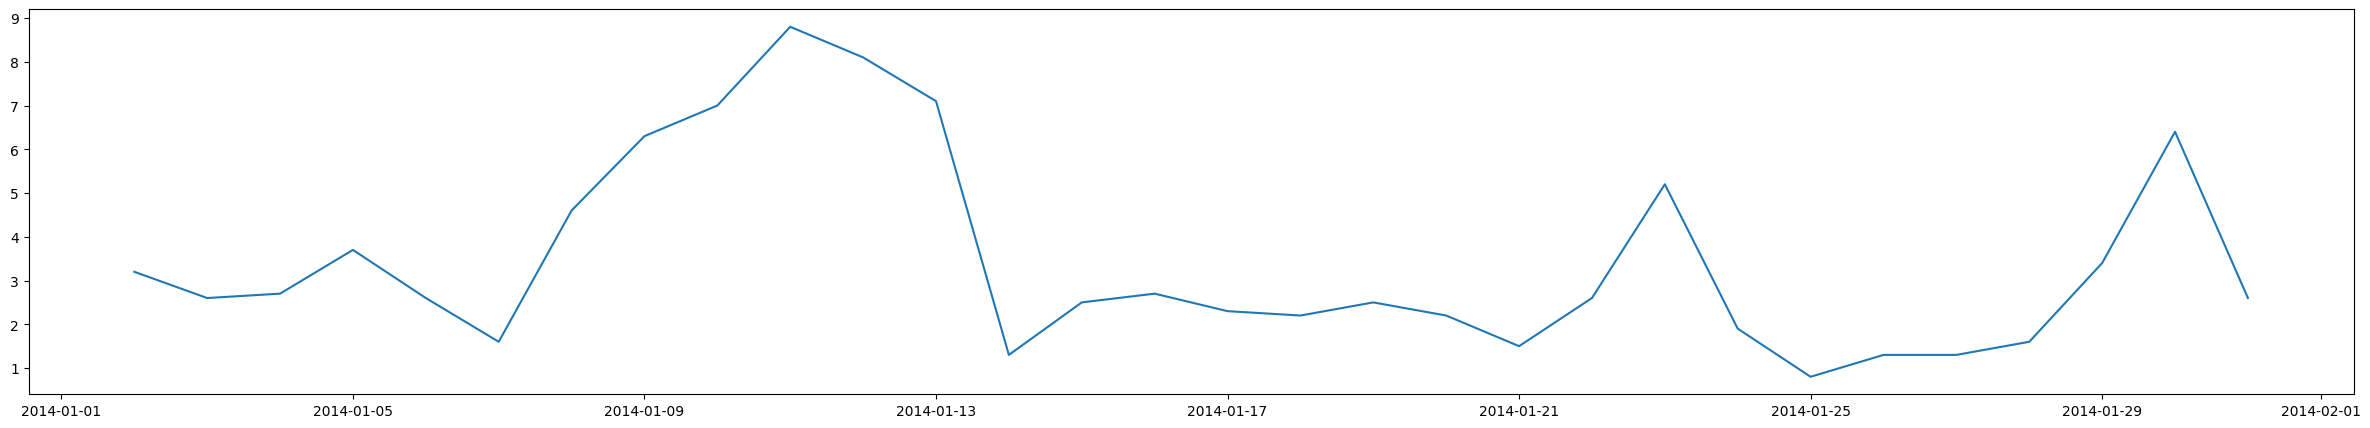

In [ ]:
# Visualization of data for a month

plt.rcParams['figure.figsize'] = [30, 5]
weather_month = weather[(weather['date']>'2014-01-01') & (weather['date']<'2014-02-01')]
plt.plot(weather_month['ds'], weather_month['wind'])
plt.show()

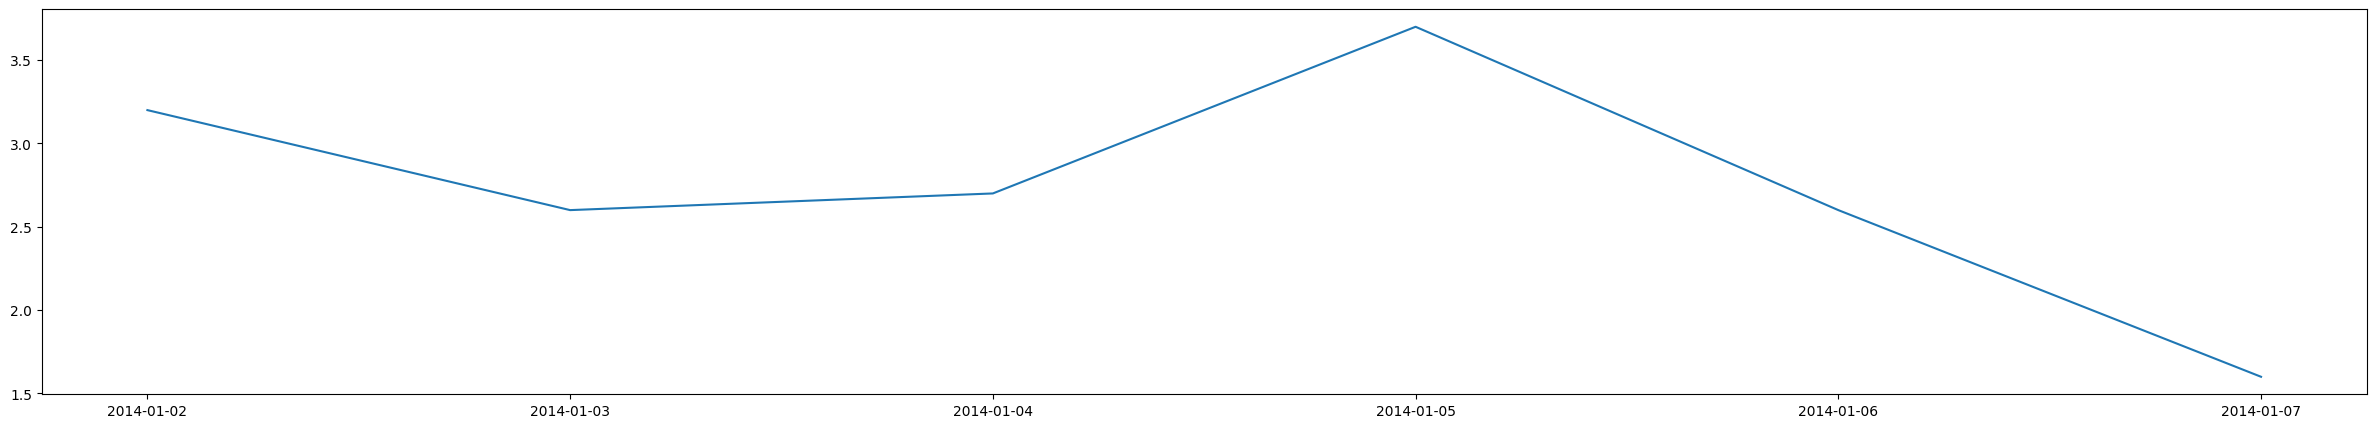

In [ ]:
# Visualization of data for a week

plt.rcParams['figure.figsize'] = [30, 5]
weather_week = weather[(weather['date']>'2014-01-01') & (weather['date']<'2014-01-08')]
plt.plot(weather_week['ds'], weather_week['wind'])
plt.show()

In [ ]:
# Training and testing data

data_subset = weather[(weather['date']>'2014-07-01') & (weather['date']<'2015-08-01')]
data_subset = data_subset.reset_index(drop = True)

In [ ]:
data_test = weather[(weather['date']>'2015-08-01') & (weather['date']<'2015-09-01')]

In [ ]:


from statsmodels.tsa.stattools import adfuller
X = data_subset['wind'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# A time series is stationary if the statistical properties of the process does not
# change over time (mu and sigma are constant over time). Here, we see the p-val is less
# than 0.5 so we can reject the null hypothesis and say the time series is stationary

ADF Statistic: -13.684509
p-value: 0.000000
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


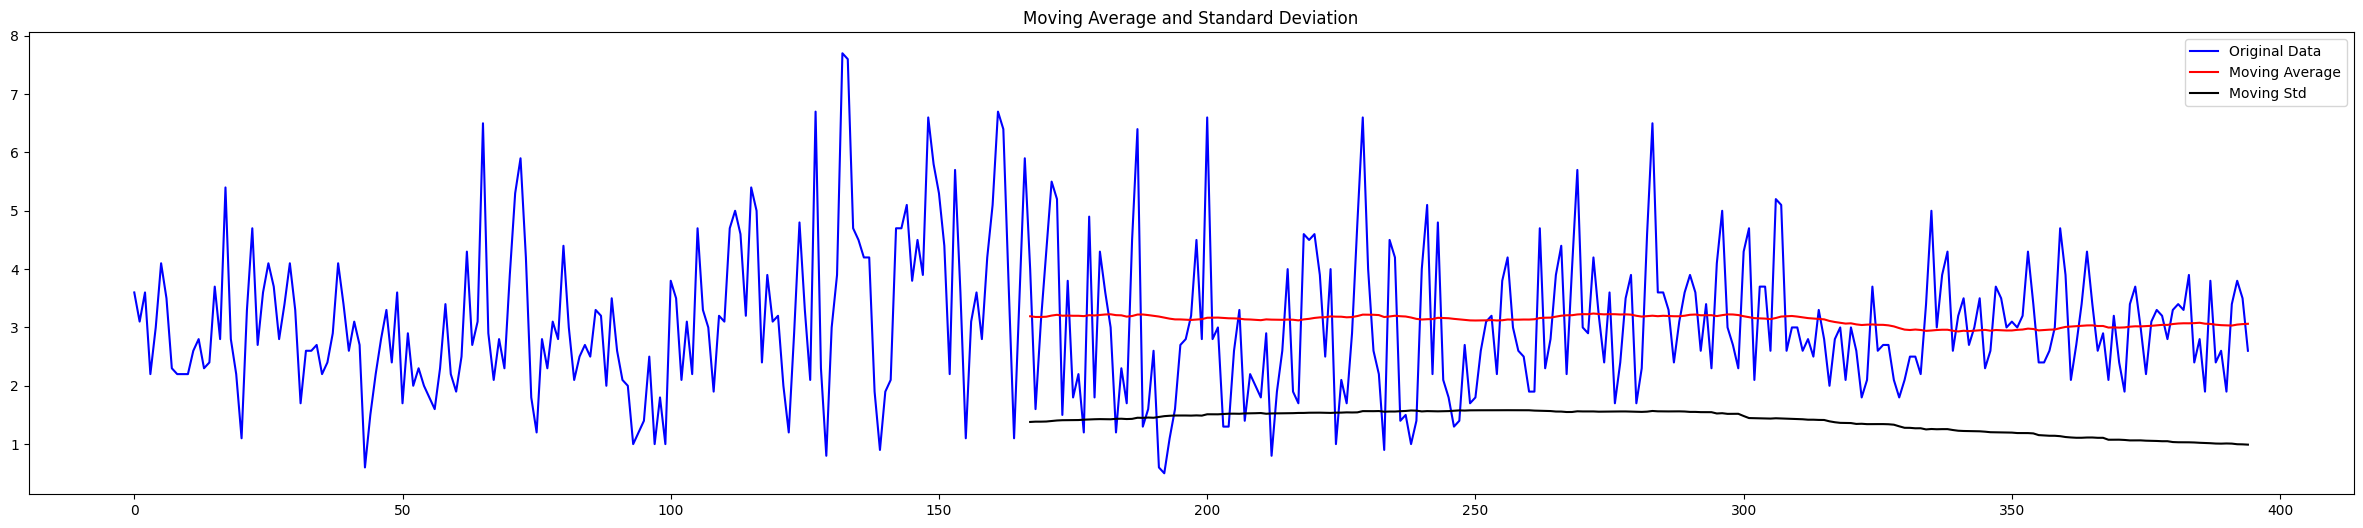

In [ ]:
# Plotting the moving average and standard deviation

plt.figure(figsize=(30,6))
orig = plt.plot(X, color='blue',label='Original Data')
moving_avg = data_subset['wind'].rolling(168).mean()
moving_std = data_subset['wind'].rolling(168).std()
plt.plot(moving_avg, color='red', label='Moving Average')
plt.plot(moving_std, color='black', label = 'Moving Std')
plt.legend(loc='best')
plt.title('Moving Average and Standard Deviation')
plt.show(block=False)

ARIMA modeling